# SENTIMENT ANALYSIS FOR FINANCIAL NEWS

IMPORTING THE LIBRARY FILES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re

DATA LOADING

In [2]:
def load_data():
    data = pd.read_csv('all-data.csv', sep=',', encoding='latin-1',names = ["category","comment"])
    return data

In [3]:
tweet_df = load_data()
df=load_data()
tweet_df.head()


,category,comment
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:

print(tweet_df.shape)
print("COLUMN NAMES" , tweet_df.columns)

print(tweet_df.info())

(4846, 2)
COLUMN NAMES Index(['category', 'comment'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4846 non-null   object
 1   comment   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


VISUALIZATION OF CATEGORIES OF TEXT DATA - EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='category', ylabel='count'>

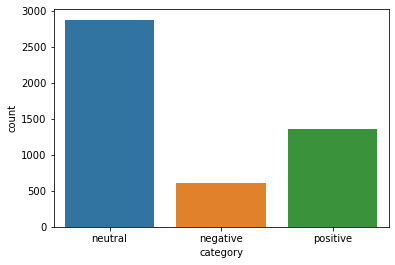

In [5]:
#TEXT VISUALIZATION 
sns.countplot(x="category",data=tweet_df)

# TEXT PRE-PROCESSING

1. REMOVING PUNCTUATIONS

In [6]:
#remove punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['comment'] = tweet_df['comment'].apply(lambda x: remove_punct(x))
tweet_df.head(10)

,category,comment
0,neutral,According to Gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company s updated strategy fo...
5,positive,FINANCING OF ASPOCOMP S GROWTH Aspocomp is agg...
6,positive,For the last quarter of Componenta s net sal...
7,positive,In the third quarter of net sales increased ...
8,positive,Operating profit rose to EUR mn from EUR mn ...
9,positive,Operating profit totalled EUR mn up from EUR...


2. STOPWORDS REMOVAL

In [7]:
#stopwords removal
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword)



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any'

In [8]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweet_df["text_wo_stop"] = tweet_df["comment"].apply(lambda text: remove_stopwords(text))
tweet_df.head()



,category,comment,text_wo_stop
0,neutral,According to Gran the company has no plans to...,According Gran company plans move production R...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans develop stages area less squ...
2,negative,The international electronic industry company ...,The international electronic industry company ...
3,positive,With the new production plant the company woul...,With new production plant company would increa...
4,positive,According to the company s updated strategy fo...,According company updated strategy years Baswa...


In [9]:
#remove 
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

tweet_df.head(20)

,category,comment,text_wo_stop
0,neutral,According to Gran the company has no plans to move all production to Russia although that is w...,According Gran company plans move production Russia although company growing
1,neutral,Technopolis plans to develop in stages an area of no less than square meters in order to host c...,Technopolis plans develop stages area less square meters order host companies working computer t...
2,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Ta...,The international electronic industry company Elcoteq laid tens employees Tallinn facility contr...
3,positive,With the new production plant the company would increase its capacity to meet the expected incre...,With new production plant company would increase capacity meet expected increase demand would im...
4,positive,According to the company s updated strategy for the years Basware targets a longterm net sales...,According company updated strategy years Basware targets longterm net sales growth range operati...
5,positive,FINANCING OF ASPOCOMP S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasi...,FINANCING OF ASPOCOMP S GROWTH Aspocomp aggressively pursuing growth strategy increasingly focus...
6,positive,For the last quarter of Componenta s net sales doubled to EURm from EURm for the same period a...,For last quarter Componenta net sales doubled EURm EURm period year earlier moved zero pretax pr...
7,positive,In the third quarter of net sales increased by to EUR mn and operating profit by to EUR ...,In third quarter net sales increased EUR mn operating profit EUR mn
8,positive,Operating profit rose to EUR mn from EUR mn in the corresponding period in representing of ...,Operating profit rose EUR mn EUR mn corresponding period representing net sales
9,positive,Operating profit totalled EUR mn up from EUR mn in representing of net sales,Operating profit totalled EUR mn EUR mn representing net sales


3. STEMMING AND LEMMATIZATION OF TEXT DATA


In [10]:
#stemming and lemmatization
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
tweet_df["text_stemmed"] = tweet_df["text_wo_stop"].apply(lambda text: stem_words(text))
tweet_df.head()



,category,comment,text_wo_stop,text_stemmed
0,neutral,According to Gran the company has no plans to move all production to Russia although that is w...,According Gran company plans move production Russia although company growing,accord gran compani plan move product russia although compani grow
1,neutral,Technopolis plans to develop in stages an area of no less than square meters in order to host c...,Technopolis plans develop stages area less square meters order host companies working computer t...,technopoli plan develop stage area less squar meter order host compani work comput technolog tel...
2,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Ta...,The international electronic industry company Elcoteq laid tens employees Tallinn facility contr...,the intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier lay...
3,positive,With the new production plant the company would increase its capacity to meet the expected incre...,With new production plant company would increase capacity meet expected increase demand would im...,with new product plant compani would increas capac meet expect increas demand would improv use r...
4,positive,According to the company s updated strategy for the years Basware targets a longterm net sales...,According company updated strategy years Basware targets longterm net sales growth range operati...,accord compani updat strategi year baswar target longterm net sale growth rang oper profit margi...


4. COUNT VECTORIZATION

In [11]:
#remove frequent words - countvectorization
from collections import Counter
cnt = Counter()
for text in tweet_df["text_stemmed"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('the', 1354),
 ('eur', 1310),
 ('compani', 971),
 ('mn', 593),
 ('oper', 571),
 ('said', 544),
 ('finnish', 513),
 ('sale', 501),
 ('million', 442),
 ('share', 438),
 ('profit', 430),
 ('net', 413),
 ('servic', 341),
 ('finland', 337),
 ('year', 331),
 ('group', 328),
 ('product', 324),
 ('new', 317),
 ('market', 317),
 ('mln', 290)]

5. REMOVAL OF THE MOST FREQUENT WORDS

In [12]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

tweet_df["text__stopfreq"] = tweet_df["text_stemmed"].apply(lambda text: remove_freqwords(text))
tweet_df.head()

,category,comment,text_wo_stop,text_stemmed,text__stopfreq
0,neutral,According to Gran the company has no plans to move all production to Russia although that is w...,According Gran company plans move production Russia although company growing,accord gran compani plan move product russia although compani grow,accord gran plan move product russia although grow
1,neutral,Technopolis plans to develop in stages an area of no less than square meters in order to host c...,Technopolis plans develop stages area less square meters order host companies working computer t...,technopoli plan develop stage area less squar meter order host compani work comput technolog tel...,technopoli plan develop stage area less squar meter order host work comput technolog telecommun ...
2,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Ta...,The international electronic industry company Elcoteq laid tens employees Tallinn facility contr...,the intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier lay...,intern electron industri elcoteq laid ten employe tallinn facil contrari earlier layoff contract...
3,positive,With the new production plant the company would increase its capacity to meet the expected incre...,With new production plant company would increase capacity meet expected increase demand would im...,with new product plant compani would increas capac meet expect increas demand would improv use r...,with new product plant would increas capac meet expect increas demand would improv use raw mater...
4,positive,According to the company s updated strategy for the years Basware targets a longterm net sales...,According company updated strategy years Basware targets longterm net sales growth range operati...,accord compani updat strategi year baswar target longterm net sale growth rang oper profit margi...,accord updat strategi year baswar target longterm net growth rang profit margin net


In [13]:

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

tweet_df["text_lemmatized"] = tweet_df["text__stopfreq"].apply(lambda text: lemmatize_words(text))
tweet_df.head()

,category,comment,text_wo_stop,text_stemmed,text__stopfreq,text_lemmatized
0,neutral,According to Gran the company has no plans to move all production to Russia although that is w...,According Gran company plans move production Russia although company growing,accord gran compani plan move product russia although compani grow,accord gran plan move product russia although grow,accord gran plan move product russia although grow
1,neutral,Technopolis plans to develop in stages an area of no less than square meters in order to host c...,Technopolis plans develop stages area less square meters order host companies working computer t...,technopoli plan develop stage area less squar meter order host compani work comput technolog tel...,technopoli plan develop stage area less squar meter order host work comput technolog telecommun ...,technopoli plan develop stage area less squar meter order host work comput technolog telecommun ...
2,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Ta...,The international electronic industry company Elcoteq laid tens employees Tallinn facility contr...,the intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier lay...,intern electron industri elcoteq laid ten employe tallinn facil contrari earlier layoff contract...,intern electron industri elcoteq lay ten employe tallinn facil contrari earlier layoff contract ...
3,positive,With the new production plant the company would increase its capacity to meet the expected incre...,With new production plant company would increase capacity meet expected increase demand would im...,with new product plant compani would increas capac meet expect increas demand would improv use r...,with new product plant would increas capac meet expect increas demand would improv use raw mater...,with new product plant would increas capac meet expect increas demand would improv use raw mater...
4,positive,According to the company s updated strategy for the years Basware targets a longterm net sales...,According company updated strategy years Basware targets longterm net sales growth range operati...,accord compani updat strategi year baswar target longterm net sale growth rang oper profit margi...,accord updat strategi year baswar target longterm net growth rang profit margin net,accord updat strategi year baswar target longterm net growth rang profit margin net


6. DROPPING THE UN-USED COLUMNS

In [14]:
#drop the columns
tweet_df=tweet_df.drop(["text_stemmed","text__stopfreq"],axis=1)

7. LABEL ENCODING OF THE CATEGORICAL VARIABLES

In [15]:
#label encoding
from sklearn.preprocessing import LabelEncoder
tweet_df['encoded_category'] = LabelEncoder().fit_transform(tweet_df['category'])
tweet_df[["category", "encoded_category"]] 

,category,encoded_category
0,neutral,1
1,neutral,1
2,negative,0
3,positive,2
4,positive,2
...,...,...
4841,negative,0
4842,neutral,1
4843,negative,0
4844,negative,0


In [16]:
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [17]:
tweet_df=tweet_df.drop(["category","text_wo_stop","comment"],axis=1)

PREVIEW OF THE CLEAN AND PRE-PROCESSED TEXT

In [18]:
tweet_df.head(10)

,text_lemmatized,encoded_category
0,accord gran plan move product russia although grow,1
1,technopoli plan develop stage area less squar meter order host work comput technolog telecommun ...,1
2,intern electron industri elcoteq lay ten employe tallinn facil contrari earlier layoff contract ...,0
3,with new product plant would increas capac meet expect increas demand would improv use raw mater...,2
4,accord updat strategi year baswar target longterm net growth rang profit margin net,2
5,financ OF aspocomp S growth aspocomp aggress pursu growth strategi increasingli focus technolog ...,2
6,for last quarter componenta net doubl eurm eurm period year earlier move zero pretax profit pret...,2
7,In third quarter net increas profit,2
8,profit rise correspond period repres net,2
9,profit total repres net,2


# CLASSIFICATION MODEL BUILDING

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

SPLITTING OF TRAIN AND TEST DATA

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

x_train,x_test,y_train,y_test = train_test_split(tweet_df.text_lemmatized,tweet_df.encoded_category,test_size = 0.3 , random_state = 0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3392,), (1454,), (3392,), (1454,))

1. LINEAR SUPPORT VECTOR MACHINE

In [21]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

MODEL - LINEAR SVC
accuracy score: 74.14%
[[ 94  63  25]
 [ 27 763  89]
 [ 21 151 221]]
              precision    recall  f1-score   support

           0       0.66      0.52      0.58       182
           1       0.78      0.87      0.82       879
           2       0.66      0.56      0.61       393

    accuracy                           0.74      1454
   macro avg       0.70      0.65      0.67      1454
weighted avg       0.73      0.74      0.73      1454



2. LOGISTIC REGRESSION

In [22]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("MODEL - LOGISTIC REGRESSION")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

MODEL - LOGISTIC REGRESSION
accuracy: 73.66%
[[ 63  95  24]
 [  5 826  48]
 [ 12 199 182]]
              precision    recall  f1-score   support

           0       0.79      0.35      0.48       182
           1       0.74      0.94      0.83       879
           2       0.72      0.46      0.56       393

    accuracy                           0.74      1454
   macro avg       0.75      0.58      0.62      1454
weighted avg       0.74      0.74      0.71      1454



3. MULTINOMIAL NAIVE BAYES

In [23]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("MULTINOMIAL NAIVE BAYES")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

MULTINOMIAL NAIVE BAYES
accuracy: 69.26%
[[ 16 117  49]
 [  0 859  20]
 [  1 260 132]]
              precision    recall  f1-score   support

           0       0.94      0.09      0.16       182
           1       0.69      0.98      0.81       879
           2       0.66      0.34      0.44       393

    accuracy                           0.69      1454
   macro avg       0.76      0.47      0.47      1454
weighted avg       0.72      0.69      0.63      1454



4. BERNOULLI NAIVE BAYES 

In [24]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("BERNOULLIS NAIVE BAYES")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

BERNOULLIS NAIVE BAYES
accuracy: 70.77%
[[ 15 102  65]
 [  0 834  45]
 [  1 212 180]]
              precision    recall  f1-score   support

           0       0.94      0.08      0.15       182
           1       0.73      0.95      0.82       879
           2       0.62      0.46      0.53       393

    accuracy                           0.71      1454
   macro avg       0.76      0.50      0.50      1454
weighted avg       0.72      0.71      0.66      1454



5. GRADIENT BOOSTING CLASSIFICATION MODEL

In [25]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("GRADIENT BOOST")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

GRADIENT BOOST
accuracy: 60.45%
[[  0 182   0]
 [  0 879   0]
 [  0 393   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       182
           1       0.60      1.00      0.75       879
           2       0.00      0.00      0.00       393

    accuracy                           0.60      1454
   macro avg       0.20      0.33      0.25      1454
weighted avg       0.37      0.60      0.46      1454



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. XGBOOST CLASSIFICATION MODEL

In [26]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("XGBOOST")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

XGBOOST
accuracy: 69.53%
[[ 50 114  18]
 [ 13 834  32]
 [ 15 251 127]]
              precision    recall  f1-score   support

           0       0.64      0.27      0.38       182
           1       0.70      0.95      0.80       879
           2       0.72      0.32      0.45       393

    accuracy                           0.70      1454
   macro avg       0.68      0.52      0.54      1454
weighted avg       0.69      0.70      0.65      1454



7. DECISION TREE CLASSIFICATION MODEL

In [27]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("DECISION TREE")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

DECISION TREE
accuracy: 70.29%
[[ 46 121  15]
 [  8 833  38]
 [  8 242 143]]
              precision    recall  f1-score   support

           0       0.74      0.25      0.38       182
           1       0.70      0.95      0.80       879
           2       0.73      0.36      0.49       393

    accuracy                           0.70      1454
   macro avg       0.72      0.52      0.56      1454
weighted avg       0.71      0.70      0.66      1454



8. K- NEAREST NEIGHBOUR CLASSIFIER MODEL

In [28]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("K NEAREST NEIGHBOR")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

K NEAREST NEIGHBOR
accuracy: 70.01%
[[ 77  62  43]
 [ 22 766  91]
 [ 27 191 175]]
              precision    recall  f1-score   support

           0       0.61      0.42      0.50       182
           1       0.75      0.87      0.81       879
           2       0.57      0.45      0.50       393

    accuracy                           0.70      1454
   macro avg       0.64      0.58      0.60      1454
weighted avg       0.68      0.70      0.69      1454



CONCLUSION

Based on the above model comparison we can infer that Linear SVC model predicts the text classification at a better rate of accuracy than other models.



This is my first kernel and first attempt in text analytics. Critics are expected as in to improve me further. Thanks in Advance!! :)